In [143]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection  import  train_test_split 
from  sklearn.tree  import  export_graphviz 
from  sklearn  import  tree
from  sklearn  import  metrics
%matplotlib inline

In [144]:
#Importando as bases de dados
#Dataframe de treinamento
df_treino = pd.read_csv('train.csv')

#Dataframe de teste
df_teste = pd.read_csv('test.csv')

In [145]:
#Vendo as 5 primeiras linhas do df_treino
df_treino.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [146]:
#Estatísticas
df_treino.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [147]:
#Verificando valores nulos
df_treino.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [148]:
#Adicionando uma nova coluna e renomeando 
df_treino.insert(1, 'day', '')
df_treino.insert(2, 'hours', '')

df_treino = df_treino.rename(columns = {'datetime': 'date'})
df_treino.head()

,date,day,hours,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,,,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,,,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,,,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,,,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,,,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [149]:
#Separando data de hora
aux_0 = df_treino['date'].unique()
day = 1

for x in range(len(df_treino)):
    #Extraindo data
    aux_1 = aux_0[x-1]
    date = aux_1[0:10]

    df_treino.at[x, 'date'] = date

    #Extraindo hora
    aux_1 = aux_0[x]
    hours = aux_1[10:13]

    df_treino.at[x, 'hours'] = hours

    #Adicionando os dias decorridos
    if int(hours) == 1:
        day = day + 1
        
    df_treino.at[x, 'day'] = day

In [150]:
#Visualizando o dataframe alterado
df_treino.head(50)

,date,day,hours,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-12-19,1,00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,2,01,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,2,02,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,2,03,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,2,04,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01,2,05,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01,2,06,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01,2,07,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01,2,08,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01,2,09,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [151]:
#Separando o target
y_test = df_treino['count']
y_test.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

<BarContainer object of 7 artists>

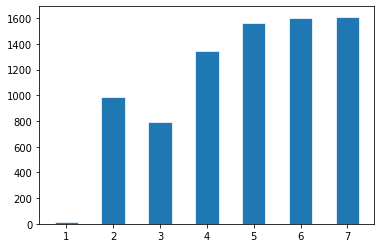

In [164]:
x_graph_1 = []
y_graph_1 = []

for x in range(7):
    x_graph_1.append(x+1)

    aux_0 = df_treino.query('day == {}'.format(x+1))
    y_graph_1.append(aux_0['count'].sum())

plt.bar(x_graph_1, y_graph_1, width=0.5, edgecolor="white", linewidth=0.7)

In [ ]:
#Removendo colunas não utilizadas, montando as features
df_treino = df_treino.drop(columns= ['date', 'casual', 'registered', 'count'])
